In [20]:
from dataset import PetsDataset
from model import UNet
from utils import evaluate, plot_examples, infer

In [21]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, RandomSampler, random_split

import matplotlib.pyplot as plt

In [22]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Load pretrained model and data

In [23]:
model = UNet(in_channels=3, num_classes=3).to(DEVICE)
model.load_state_dict(torch.load("../pretrained/pets_unet_e20.pt"))

<All keys matched successfully>

In [24]:
trainval_set = PetsDataset("../data/", split="trainval")
train_set, val_set = random_split(trainval_set, [0.75, 0.25], generator=torch.Generator().manual_seed(42))
train_loader = DataLoader(train_set, batch_size=32)
val_loader = DataLoader(val_set, batch_size=32)

test_set = PetsDataset("../data/", split="trainval")
test_loader = DataLoader(test_set, batch_size=32)

# Evaluate model

In [28]:
train_iou, train_acc = evaluate(model, train_loader, DEVICE)
print(f"train: iou={train_iou:.4f}, acc={train_acc:.4f}")

val_iou, val_acc = evaluate(model, val_loader, DEVICE)
print(f"val:   iou={val_iou:.4f}, acc={val_acc:.4f}")

test_iou, test_acc = evaluate(model, test_loader, DEVICE)
print(f"test:  iou={test_iou:.4f}, acc={test_acc:.4f}")

train: iou=0.7718, acc=0.9507
val:   iou=0.7013, acc=0.9224
test:  iou=0.7428, acc=0.9388


# Examples

In [32]:
num_samples = 5

sampler = RandomSampler(test_set, num_samples=num_samples, generator=torch.Generator().manual_seed(42))
img, target = next(iter(DataLoader(test_set, batch_size=num_samples, sampler=sampler)))

target_mask = target.argmax(1, keepdim=True)
prediction_mask = infer(model, img, DEVICE)

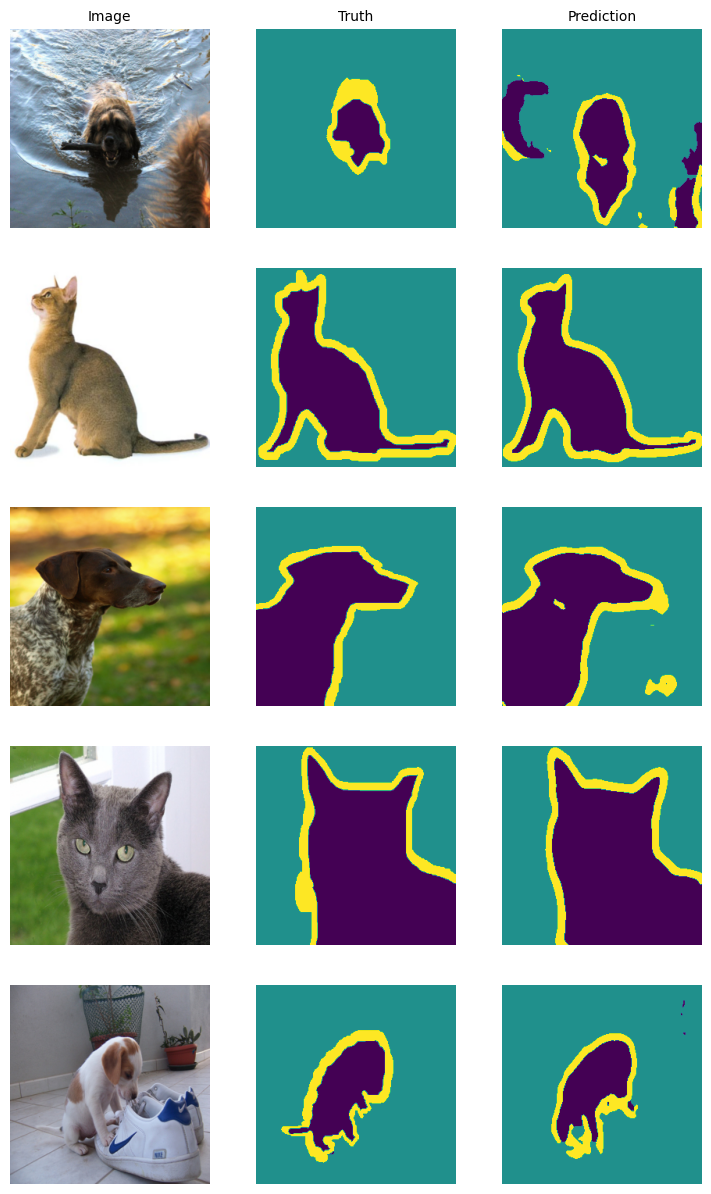

In [33]:
plot_examples(img, target_mask, prediction_mask)